In [208]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, auc
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import datetime as DT


In [194]:
import pandas as pd
import matplotlib.pyplot as plt
topRanking = pd.read_csv('data/2017Ranking.csv')
history_rank= pd.read_csv('data/top100_history.csv')
all_startup_info = pd.read_csv('data/startup.ch 2013 - 2018_corrname.csv')
all_satrtup= pd.read_csv('data/startup.ch_list.csv')
all_year_ranking = pd.read_csv('data/ranked_per_year.csv')

In [254]:
all_satrtup['in2017']= all_satrtup.comps.isin(topRanking.comps) *1
all_satrtup['in2016']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2016.isnull()]) *1
all_satrtup['in2015']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2015.isnull()]) *1
all_satrtup['in2014']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2014.isnull()]) *1
all_satrtup['in2013']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2013.isnull()]) *1
all_satrtup['in2012']=all_satrtup.comps.isin(history_rank.comps[~history_rank.X2012.isnull()]) *1
mydata = pd.merge(all_satrtup,all_startup_info.iloc[:,[12,7,8,9]],on='comps')
print mydata.shape
mydata  = pd.merge(mydata,topRanking,on='comps',how='left')
mydata['age'] =(pd.Timestamp(DT.datetime.now())- pd.to_datetime(mydata['Incorporation.Date'])).astype('<m8[Y]')
mydata[mydata.age<0].age = 0
mydata.drop('Incorporation.Date',axis=1,inplace=True)
mydata['Number.of.Employees'][mydata['Number.of.Employees'].isnull()]=0
mydata =mydata.sample(frac=1).reset_index(drop=True)
mydata['ranking2017_y'][mydata['ranking2017_y'].isnull()] =0
mydata.head()

(666, 11)


/Users/schoobdar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/schoobdar/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,comps,in2017,in2016,in2015,in2014,in2013,in2012,ranking2017_x,Technology,Number.of.Employees,ranking2017_y,age
0,lumendo,0,0,0,0,0,0,0,Medtech,4.0,0.0,0.0
1,soflow,0,0,0,0,0,0,0,NaN,0.0,0.0,3.0
2,optimo medical,0,0,0,0,0,0,0,NaN,0.0,0.0,2.0
3,audiolize,0,0,0,0,0,0,0,"Internet, Mobile",0.0,0.0,4.0
4,imaginecargo,0,0,0,0,0,0,0,Cleantech,6.0,0.0,3.0


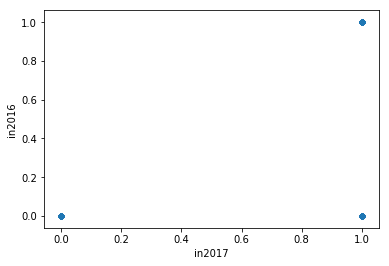

In [207]:
mydata.plot.scatter('in2017','in2016',)
plt.show()

[[0 0 0 0 0]
 [0 0 0 0 0]
 [0 0 0 0 0]
 ...
 [0 0 0 0 0]
 [0 0 0 0 0]
 [1 0 0 0 0]]


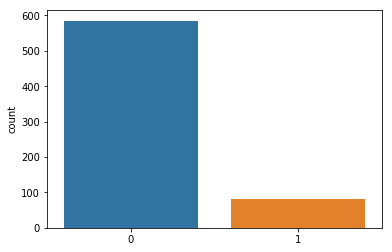

(666, 5)


In [201]:
y=mydata.in2017.values
x=mydata.iloc[:,2:7].values
print x
ax = sns.countplot(y,label="Count")      
plt.show()
print x.shape

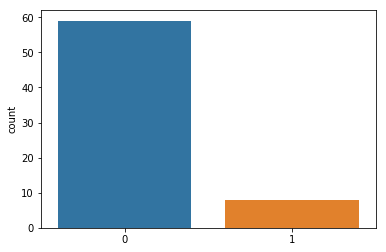

F-score:  [0.98333333 0.85714286]
precision: 0.9999999999998334 recall: 0.7499999999999063


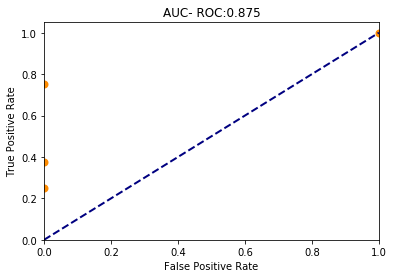

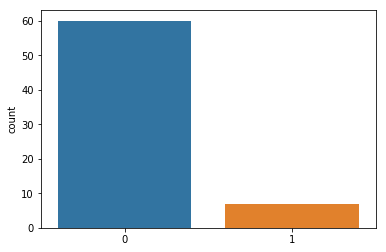

F-score:  [0.97560976 0.72727273]
precision: 0.99999999999975 recall: 0.5714285714284898


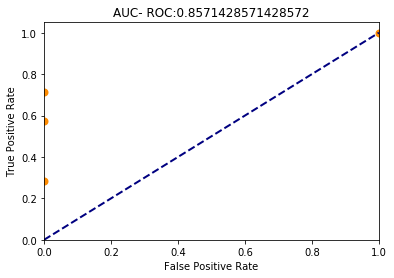

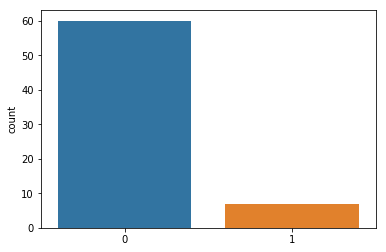

F-score:  [0.97560976 0.72727273]
precision: 0.99999999999975 recall: 0.5714285714284898


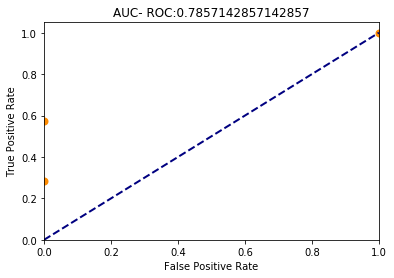

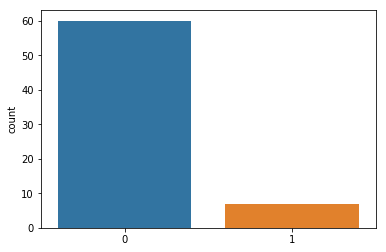

F-score:  [0.98360656 0.83333333]
precision: 0.9999999999997999 recall: 0.7142857142856123


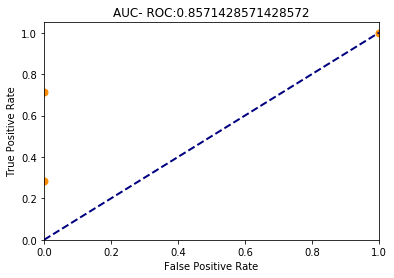

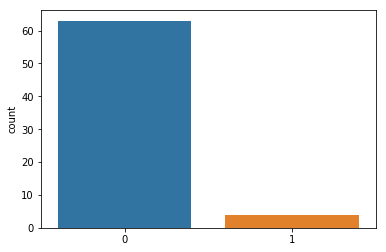

F-score:  [0.984375   0.66666667]
precision: 0.9999999999995 recall: 0.499999999999875


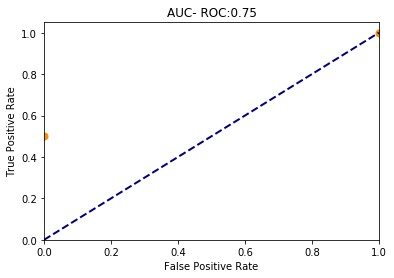

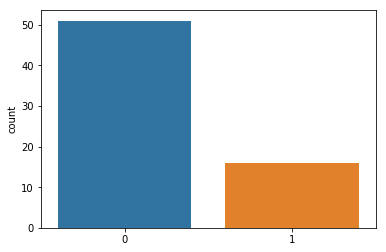

F-score:  [0.92727273 0.66666667]
precision: 0.999999999999875 recall: 0.4999999999999688


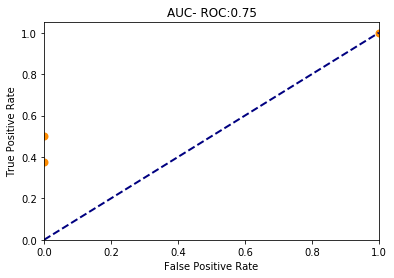

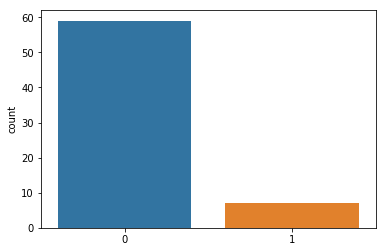

F-score:  [0.99159664 0.92307692]
precision: 0.9999999999998334 recall: 0.8571428571427346


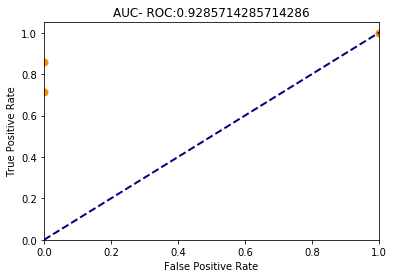

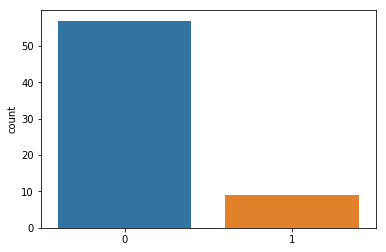

F-score:  [0.95798319 0.61538462]
precision: 0.99999999999975 recall: 0.44444444444439507


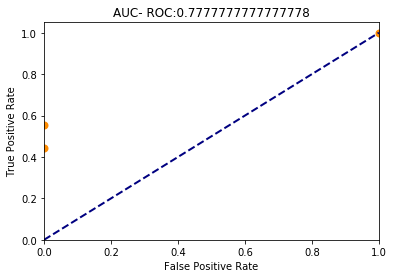

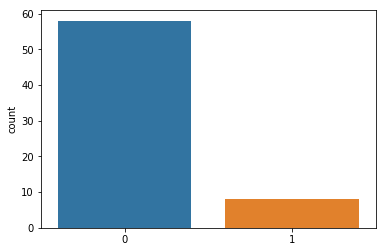

F-score:  [0.96666667 0.66666667]
precision: 0.99999999999975 recall: 0.4999999999999375


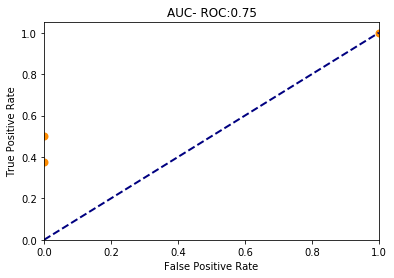

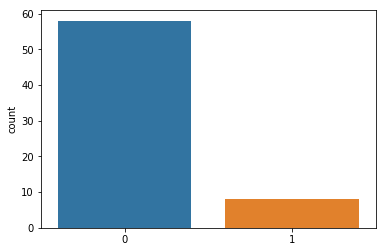

F-score:  [0.98305085 0.85714286]
precision: 0.9999999999998334 recall: 0.7499999999999063


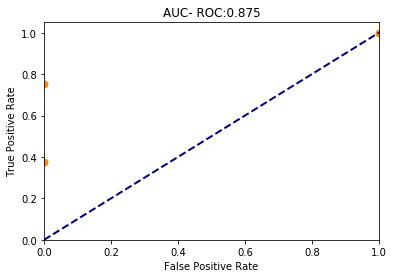

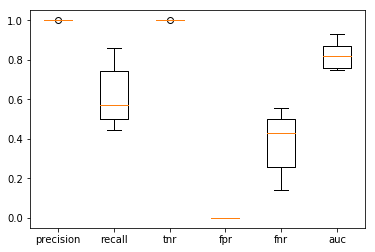

[1.         0.61587302 1.         0.         0.38412698 0.82063492]


In [213]:
### in top100 or not classification

from sklearn.model_selection import KFold
from sklearn import svm
kf = KFold(n_splits=10)
acc_scores=[]
for train_index, test_index in kf.split(x):
    

    y_test= y[test_index]
    ax = sns.countplot(y_test,label="Count")      
    plt.show()

#     clf = svm.SVC(probability=True,kernel='linear')
    clf  = RandomForestClassifier(max_depth=2, random_state=0)
    clf.fit(x[train_index], y[train_index])
    y_pred = clf.predict(x[test_index])
    y_score = clf.predict_proba(x[test_index])
    
    print "F-score: " ,f1_score(y_test, y_pred,average=None)

    pc=1
    nc=0
    tp = sum(y_pred[y_test==pc]==pc)
    fn = sum(y_pred[y_test==pc]==nc)
    fp = sum(y_pred[y_test==nc]==pc)
    tn = sum(y_pred[y_test==nc]==nc)
    
    ep=0.000000000001
    pr = tp/float(tp+fp+ep)
    rec = tp/float(tp+fn+ep)
    fpr, tpr, thresholds = roc_curve(y_test,y_score[:,1],pos_label=1)

    roc_auc = auc(fpr, tpr)
    print 'precision:', pr, 'recall:',rec
    acc_scores.append([pr,rec,tn/float(tn+fp+ep),fp/float(tn+fp+ep),fn/float(tp+fn+ep),roc_auc])
    
    
    plt.scatter(fpr,tpr,label='ROC curve (area = %0.2f)'%roc_auc,color='darkorange',lw=2)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('AUC- ROC:'+str(roc_auc))

    plt.show()

plt.boxplot(np.array(acc_scores),labels=['precision','recall','tnr','fpr','fnr','auc'])
plt.show()
print np.nanmean(np.array(acc_scores),0)

accuracy score ( R^2 ):  -0.004413645870029903
MSE: -0.0044
accuracy score ( R^2 ):  -0.014936221974824582
MSE: -0.0149
accuracy score ( R^2 ):  -0.10978507669419278
MSE: -0.1098
accuracy score ( R^2 ):  -0.05747930459555528
MSE: -0.0575
accuracy score ( R^2 ):  -0.013862452478636378
MSE: -0.0139
accuracy score ( R^2 ):  -0.021794718171451732
MSE: -0.0218
accuracy score ( R^2 ):  -0.023344366636899316
MSE: -0.0233
accuracy score ( R^2 ):  0.0065020361324987785
MSE: 0.0065
accuracy score ( R^2 ):  -0.9812166672917065
MSE: -0.9812
accuracy score ( R^2 ):  0.01855490350577582
MSE: 0.0186


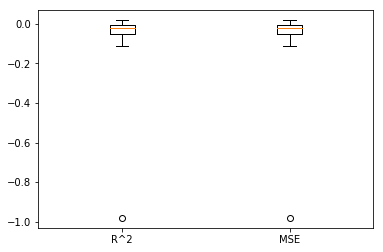

[-0.12017755 -0.12017755]


In [262]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#### predict ranking
y=mydata['ranking2017_y'].values


kf = KFold(n_splits=10)
acc_scores=[]
for train_index, test_index in kf.split(x):
    

    y_test= y[test_index]
  

    regr = RandomForestRegressor(max_depth=2, random_state=0)
    regr.fit(x[train_index], y[train_index])
    y_pred = regr.predict(x[test_index])
    r2 = regr.score(x[test_index], y_test)
    print "accuracy score ( R^2 ): " ,r2
    mse = r2_score(y_test, y_pred)
    print("MSE: %.4f" % mse)

   
    acc_scores.append([r2,mse])
    
    
    

plt.boxplot(np.array(acc_scores),labels=['R^2','MSE'])
plt.show()
print np.nanmean(np.array(acc_scores),0)